<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/24_3_Multilayer_Perceptron_Using_the_Window_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step. This is called the window method, and the size of the window is a parameter that can be tuned for each problem. 

For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2). When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1.


The create dataset() function we wrote in the previous section allows us to create this formulation of the time series problem by increasing the look back argument from 1 to 3. A sample of the dataset with this formulation looks as follows:

X1 .. X2 ..  X3 ..  Y

112 118 132 129

118 132 129 121

132 129 121 135

129 121 135 148

121 135 148 148


We can re-run the example in the previous section with the larger window size. The whole
code listing with just the window size change is listed below for completeness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

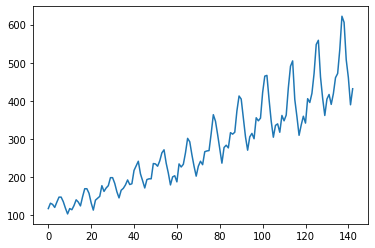

In [4]:
dataframe = pd.read_csv("/content/international-airline-passengers.csv", usecols=[1], delimiter=';')
plt.plot(dataframe)
plt.show()

In [5]:
dataset = dataframe.values
dataset = dataset.astype( 'float32' )
dataset

array([[118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [29

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

95 48


In [9]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 90396.6132
Epoch 2/200
 - 0s - loss: 63693.6622
Epoch 3/200
 - 0s - loss: 48523.3949
Epoch 4/200
 - 0s - loss: 33729.9831
Epoch 5/200
 - 0s - loss: 18943.3445
Epoch 6/200
 - 0s - loss: 8076.5884
Epoch 7/200
 - 0s - loss: 3005.7984
Epoch 8/200
 - 0s - loss: 1472.6507
Epoch 9/200
 - 0s - loss: 1190.6004
Epoch 10/200
 - 0s - loss: 1151.7507
Epoch 11/200
 - 0s - loss: 1158.0442
Epoch 12/200
 - 0s - loss: 1147.6441
Epoch 13/200
 - 0s - loss: 1174.0257
Epoch 14/200
 - 0s - loss: 1160.4966
Epoch 15/200
 - 0s - loss: 1144.0735
Epoch 16/200
 - 0s - loss: 1140.9522
Epoch 17/200
 - 0s - loss: 1137.9818
Epoch 18/200
 - 0s - loss: 1140.8247
Epoch 19/200
 - 0s - loss: 1133.0844
Epoch 20/200
 - 0s - loss: 1144.4881
Epoch 21/200
 - 0s - loss: 1146.9213
Epoch 22/200
 - 0s - loss: 1125.9785
Epoch 23/200
 - 0s - loss: 1137.3316
Epoch 24/200
 - 0s - loss: 1125.9180
Epoch 25/200
 - 0s - loss: 1130.8791
Epoch 26/200
 - 0s - loss: 1113.1202
Epoch 27/200
 - 0s - loss: 1112.0377
Epoch

In [11]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 613.00 MSE (24.76 RMSE)
Test Score: 2640.11 MSE (51.38 RMSE)


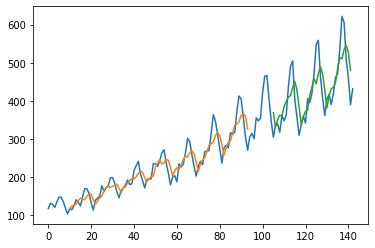

In [12]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction of the Number of Passengers using a Simple Multilayer Perceptron
Model With Time Lag. Blue=Whole Dataset, Green=Training, Red=Predictions

We can see that the error was reduced compared to that of the previous section. Again, the
window size and the network architecture were not tuned, this is just a demonstration of how
to frame a prediction problem. Taking the square root of the performance scores we can see
the average error on the training dataset was 22 passengers (in thousands per month) and the
average error on the unseen test set was 47 passengers (in thousands per month).